In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy as sp
from sklearn import mixture

In [2]:
n_samples = 300
# generate random sample, two components
np.random.seed(0)
# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])
# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)
# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

In [3]:
# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)

GaussianMixture(n_components=2)

In [4]:
clf.means_

array([[19.91453549, 19.97556345],
       [-0.13607006, -0.07059606]])

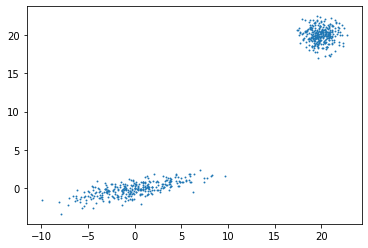

In [5]:
plt.scatter(X_train[:, 0], X_train[:, 1], .8)


array([-20.        , -18.7755102 , -17.55102041, -16.32653061,
       -15.10204082, -13.87755102, -12.65306122, -11.42857143,
       -10.20408163,  -8.97959184,  -7.75510204,  -6.53061224,
        -5.30612245,  -4.08163265,  -2.85714286,  -1.63265306,
        -0.40816327,   0.81632653,   2.04081633,   3.26530612,
         4.48979592,   5.71428571,   6.93877551,   8.16326531,
         9.3877551 ,  10.6122449 ,  11.83673469,  13.06122449,
        14.28571429,  15.51020408,  16.73469388,  17.95918367,
        19.18367347,  20.40816327,  21.63265306,  22.85714286,
        24.08163265,  25.30612245,  26.53061224,  27.75510204,
        28.97959184,  30.20408163,  31.42857143,  32.65306122,
        33.87755102,  35.10204082,  36.32653061,  37.55102041,
        38.7755102 ,  40.        ])

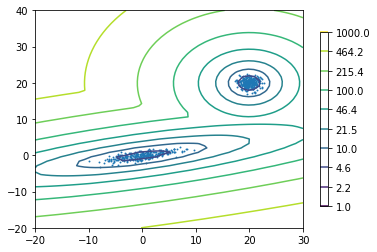

In [168]:
# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)
CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)
# plt.title('Negative log-likelihood predicted by a GMM')
# plt.axis('tight')
plt.show()

In [38]:
#define number of cluster labels
J=2
phi=np.full(J,1/J)
random_row = np.random.randint(low=0, high=X_train.shape[0], size=2)
mu = [X_train[row_index, :] for row_index in random_row]
sigma = [ np.cov(X.T) for _ in range(J) ]
ws=np.full(X_train.shape[0],1/J)

array([[[1.02179964e+00, 3.28158679e-03],
        [3.28158679e-03, 9.90375215e-01]],

       [[1.13328040e+01, 2.25048269e+00],
        [2.25048269e+00, 8.77009968e-01]]])

In [169]:
np.mean(X_train)

9.920858204388146

In [15]:
def Guassian(x, u, sig):
    x_u=x-u
    sig_inv = np. linalg.inv(sig)
    in_exp = np. exp(-1*0.5*np.matmul(np.matmul(x_u, sig_inv), x_u.T))
    a=np. power(2*np. pi, cols-1)*np. linalg. det(sig)
    out_exp=1/np.sqrt(a)
    return


In [21]:
mu=np.array(mu)


(1, 2)

In [24]:
# X_train.shape

(600, 2)

In [ ]:
# #M-step
# def m_step(ws,X_train,mu):
#     frac2 = 0
#     for i in range(X_train.shape[0]):
#         frac1+=np.dot(np.dot(ws[i],X_train[i]-mu),X_train[i]-mu).T
#     for j in range(X_train.shape[0]):
#         frac2+=ws[j]
#         print(frac2)

# m_step(ws,X_train,mu)
    

In [17]:
# X_train[0:5]

array([[21.76405235, 20.40015721],
       [20.97873798, 22.2408932 ],
       [21.86755799, 19.02272212],
       [20.95008842, 19.84864279],
       [19.89678115, 20.4105985 ]])

In [48]:
# import numpy as np
# from scipy.stats import multivariate_normal

# class GMM:
#     def __init__(self, k, max_iter=5):
#         self.k = k
#         self.max_iter = int(max_iter)

#     def initialize(self, X):
#         self.shape = X.shape
#         self.n, self.m = self.shape

#         self.phi = np.full(shape=self.k, fill_value=1/self.k)
#         self.weights = np.full(shape=self.shape, fill_value=1/self.k)

#         random_row = np.random.randint(low=0, high=self.n, size=self.k)
#         self.mu = [X[row_index, :] for row_index in random_row]
#         self.sigma = [np.cov(X.T) for _ in range(self.k)]

#     def e_step(self, X):
#         # E-Step: update weights and phi holding mu and sigma constant
#         self.weights = self.predict_proba(X)
#         self.phi = self.weights.mean(axis=0)

#     def m_step(self, X):
#         # M-Step: update mu and sigma holding phi and weights constant
#         for i in range(self.k):
#             weight = self.weights[:, [i]]
#             total_weight = weight.sum()
#             self.mu[i] = (X * weight).sum(axis=0) / total_weight
#             self.sigma[i] = np.cov(X.T,
#                                    aweights=(weight/total_weight).flatten(),
#                                    bias=True)

#     def fit(self, X):
#         self.initialize(X)

#         for iteration in range(self.max_iter):
#             self.e_step(X)
#             self.m_step(X)

#     def predict_proba(self, X):
#         likelihood = np.zeros((self.n, self.k))
#         for i in range(self.k):
#             distribution = multivariate_normal(
#                 mean=self.mu[i],
#                 cov=self.sigma[i])
#             likelihood[:, i] = distribution.pdf(X)

#         numerator = likelihood * self.phi
#         denominator = numerator.sum(axis=1)[:, np.newaxis]
#         weights = numerator / denominator
#         return weights

#     def predict(self, X):
#         weights = self.predict_proba(X)
#         return np.argmax(weights, axis=1)


Initialization

In [171]:
import numpy as np
from scipy.stats import multivariate_normal

def initialize():
    k=2
    shape=X_train.shape
    phi = np.full(k, 1/k)
    weights = np.full(X_train.shape, 1/k)
    random_row = np.random.randint(low=0, high=X_train.shape[0], size=k)
    mu = [X_train[row_index, :] for row_index in random_row]
    sigma = [np.cov(X_train.T) for _ in range(k)]
    return k,phi,weights,mu,sigma




In [172]:
def my_pdf(x, u, covar):
  # k = len(x)  # dimension
  a = np.transpose(x - u)
  b = np.linalg.inv(covar)
  c = x - u
  d = np.matmul(a, b)
  e = np.matmul(d, c)
  numer = np.exp(-0.5 * e)
  f = (2 * np.pi)**k
  g = np.linalg.det(covar)
  denom = np.sqrt(f * g)
  pdf = numer / denom
  return pdf


E step

In [173]:
def predict_proba(X,mu,sigma,phi,k):
    likelihood = np.zeros((X.shape[0], k))
    for i in range(k):
        distribution = multivariate_normal(
            mean=mu[i],
            cov=sigma[i])
        likelihood[:, i] = distribution.pdf(X)
    numerator = likelihood * phi
    denominator = numerator.sum(axis=1)[:, np.newaxis]
    weights = numerator / denominator
    return weights


In [174]:
def e_step(X,weights,phi,mu,k,sigma):
    weights = predict_proba(X,mu,sigma,phi,k)
    phi =weights.mean(axis=0)
    return weights,phi


In [175]:
def m_step(X,mu, sigma, k,weights):
    # M-Step: update mu and sigma holding phi and weights constant
    for i in range(k):
        weight = weights[:, [i]]
        total_weight = weight.sum()
        mu[i] = (X * weight).sum(axis=0) / total_weight
        sigma[i] = np.cov(X.T,aweights=(weight/total_weight).flatten(),bias=True)
        return mu,sigma


In [176]:
def fit(X):
    max_iter=10
    k, phi, weights, mu, sigma = initialize()
    for i in range(max_iter):
        weights, phi = e_step(X, weights, phi, mu, k, sigma)
        mu,sigma=m_step(X,mu,sigma,k,weights)

    return mu,sigma,phi


In [177]:
np.random.seed(42)
# gmm = GMM(k=2, max_iter=100)
# gmm.fit(X_train)
mu,sigma,phi=fit(X_train)


In [182]:
sigma

[array([[1.00853159e+00, 6.60154704e-04],
        [6.60154704e-04, 9.71987873e-01]]),
 array([[106.86210008, 101.78092632],
        [101.78092632, 101.56509456]])]

In [161]:
np.array(sigma).shape

(2, 2, 2)

In [129]:
# # multivariate_normal_pdf_demo.py

# import numpy as np
# import scipy.stats as sps


# def my_logpdf(x, u, covar):
#   k = len(x)  # dimension
#   a = np.transpose(x - u)
#   b = np.linalg.inv(covar)
#   c = x - u
#   d = np.matmul(a, b)
#   e = np.matmul(d, c)
#   numer = np.exp(-0.5 * e)
#   f = (2 * np.pi)**k
#   g = np.linalg.det(covar)
#   denom = np.sqrt(f * g)
#   pdf = numer / denom
#   return pdf


# print("\nBegin multivariate Gaussian log-pdf demo ")

# u = np.array([1.0, 3.0, 2.0], dtype=np.float32)
# v = np.array([1.0, 1.0, 1.0], dtype=np.float32)
# covar = np.diag(v)
# x = np.array([1.5, 1.5, 1.5], dtype=np.float32)

# print("\nu = ", end="")
# print(u)
# print("\ncovar = ")
# print(covar)
# print("\nx = ", end="")
# print(x)

# logp1 = sps.multivariate_normal.pdf(x, u, covar)
# print("\nlogpdf(x) using scipy logpdf() = %0.4f " % logp1)

# logp2 = my_logpdf(x, u, covar)
# print("\nlogpdf(x) using my_logpdf()    = %0.4f " % logp2)

# print("\nEnd demo ")



Begin multivariate Gaussian log-pdf demo 

u = [1. 3. 2.]

covar = 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

x = [1.5 1.5 1.5]

logpdf(x) using scipy logpdf() = 0.0161 

logpdf(x) using my_logpdf()    = 0.0161 

End demo 


In [19]:
class GMM(object):
    def __init__(self, X, k=2):
        # dimension
        X = np.asarray(X)
        self.m, self.n = X.shape
        self.data = X.copy()
        # number of mixtures
        self.k = k

    def _init(self):
        # init mixture means/sigmas
        self.mean_arr = np.asmatrix(np.random.random((self.k, self.n)))
        self.sigma_arr = np.array(
            [np.asmatrix(np.identity(self.n)) for i in range(self.k)])
        self.phi = np.ones(self.k)/self.k
        self.w = np.asmatrix(np.empty((self.m, self.k), dtype=float))
        #print(self.mean_arr)
        #print(self.sigma_arr)

    def fit(self, DELTA=1e-4):
        self._init()
        num_iters = 0
        ll = 1
        previous_ll = 0
        while(ll-previous_ll > DELTA):
            previous_ll = self.loglikelihood()
            self._fit()
            num_iters += 1
            ll = self.loglikelihood()
        #     print('Iteration %d: log-likelihood is %.6f' % (num_iters, ll))
        # print('Terminate at %d-th iteration:log-likelihood is %.6f' %
        #       (num_iters, ll))

    def loglikelihood(self):
        ll = 0
        for i in range(self.m):
            tmp = 0
            for j in range(self.k):
                #print(self.sigma_arr[j])
                tmp += sp.stats.multivariate_normal.pdf(self.data[i, :],
                                                        self.mean_arr[j, :].A1,
                                                        self.sigma_arr[j, :]) *\
                    self.phi[j]
            ll += np.log(tmp)
        return ll

    def _fit(self):
        self.e_step()
        self.m_step()

    def e_step(self):
        # calculate w_j^{(i)}
        for i in range(self.m):
            den = 0
            for j in range(self.k):
                num = sp.stats.multivariate_normal.pdf(self.data[i, :],
                                                       self.mean_arr[j].A1,
                                                       self.sigma_arr[j]) *\
                    self.phi[j]
                den += num
                self.w[i, j] = num
            self.w[i, :] /= den
            # assert self.w[i, :].sum() - 1 < 1e-4

    def m_step(self):
        for j in range(self.k):
            const = self.w[:, j].sum()
            self.phi[j] = 1/self.m * const
            _mu_j = np.zeros(self.n)
            _sigma_j = np.zeros((self.n, self.n))
            for i in range(self.m):
                _mu_j += (self.data[i, :] * self.w[i, j])
                _sigma_j += self.w[i, j] * ((self.data[i, :] - self.mean_arr[j, :]).T * (
                    self.data[i, :] - self.mean_arr[j, :]))
                #print((self.data[i, :] - self.mean_arr[j, :]).T * (self.data[i, :] - self.mean_arr[j, :]))
            self.mean_arr[j] = _mu_j / const
            self.sigma_arr[j] = _sigma_j / const
        #print(self.sigma_arr)


In [41]:
X_test = np.random.multivariate_normal([0, 3], [[0.5, 0], [0, 0.8]], 20)
X_test = np.vstack((X_test, np.random.multivariate_normal([20, 10], np.identity(2), 50)))
X_test.shape


(70, 2)

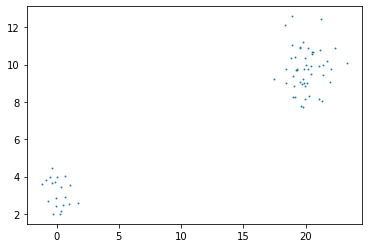

In [42]:
plt.scatter(X_test[:, 0], X_test[:, 1], .8)


In [43]:
gmm = GMM(X_test)



In [44]:
gmm.fit()

Iteration 1: log-likelihood is -389.833480
Iteration 2: log-likelihood is -295.302007
Iteration 3: log-likelihood is -247.285304
Iteration 4: log-likelihood is -238.040920
Iteration 5: log-likelihood is -238.040919
Terminate at 5-th iteration:log-likelihood is -238.040919


In [45]:
gmm.mean_arr


matrix([[ 0.10892197,  3.13604219],
        [20.05041921,  9.76416035]])

In [46]:
gmm.sigma_arr


array([[[ 0.4762451 , -0.15783881],
        [-0.15783881,  0.54157344]],

       [[ 1.28715993,  0.05443847],
        [ 0.05443847,  1.26173323]]])

In [47]:
gmm.phi


array([0.28571429, 0.71428571])

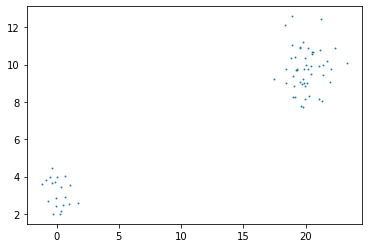

In [48]:
# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)
CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_test[:, 0], X_test[:, 1], .8)
# plt.title('Negative log-likelihood predicted by a GMM')
# plt.axis('tight')
plt.show()
